# Project: Wrangling and Analyze Data

## Libraries 

In [87]:
# Importing Libraries

import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as time

In [88]:
# Downloading Twitter-archive data directly

df_1= pd.read_csv("twitter-archive-enhanced.csv")

In [89]:
# Using Request library to download image_prediction data.

url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions (1).tsv", mode='wb') as file:
    file.write(response.content)


# Using Tweepy to query Twitters API.

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '#####'
consumer_secret = '#####'
access_token = '#####'
access_secret = '#####'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids) 

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()
print(end - start)
print(fails_dict)

In [90]:
# Converting txt to data file where each line contains one list info.

twitter_api = []

with open('tweet_json.txt',encoding = 'utf-8') as file:
    for line in file:
        twitter_api.append(json.loads(line))


In [91]:
print(twitter_api[1])

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017', 'id': 892177421306343426, 'id_str': '892177421306343426', 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV", 'truncated': False, 'display_text_range': [0, 138], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h

In [92]:
# Creating a dataframe from twitter_api to contain id, favorite_count and retweet_count

df_new = pd.DataFrame(twitter_api, columns = ['id', 'favorite_count', 'retweet_count'])

#Changing name from id to Tweet_id.
df_new = df_new.rename(columns={"id":"tweet_id"})
df_new.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,33665,6961
1,892177421306343426,29205,5266
2,891815181378084864,21958,3463
3,891689557279858688,36760,7188
4,891327558926688256,35151,7708


In [93]:
#Saving the data to a csv file.

df_new.to_csv('twitter_data.csv', index=False)

In [94]:
#Assigning saved csv data to a dataframe name"df".

df = pd.read_csv('twitter_data.csv')

In [95]:
#Checking to see if saved csv data was saved correctly.

df.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33665,6961
1,892177421306343426,29205,5266
2,891815181378084864,21958,3463


In [96]:
#Grouping all Three(3) previuosly saved data sets.

Twitter_achi = pd.read_csv("twitter-archive-enhanced.csv")
Image_Pre =  pd.read_csv('image-predictions (1).tsv', sep='\t')
Twitter_API = pd.read_csv('twitter_data.csv')

## Assessing Data


In [97]:
# Viewing saved Twitter Achieved data

Twitter_achi.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [98]:
# Removing RT@ from the retweet columns
Twitter_achi = Twitter_achi[Twitter_achi.retweeted_status_id.isnull()]
Twitter_achi = Twitter_achi[Twitter_achi.retweeted_status_user_id.isnull()]
Twitter_achi = Twitter_achi[Twitter_achi.retweeted_status_timestamp.isnull()]


In [99]:
#Checking Data statistics

Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [100]:
#Taking a random sampling to data to visually check for quality and tidiness issues.

Twitter_achi.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None,None,None,None
509,812466873996607488,NaN,NaN,2016-12-24 01:16:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mary. She's desperately trying to recr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812466873...,12,10,Mary,None,None,None,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None
196,854732716440526848,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,None,None,None,None
86,875747767867523072,NaN,NaN,2017-06-16 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Goose. He's a womanizer. Cheeky as h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,None,None,None,None


In [101]:
# Query data to check for unique values of rating_denomintors

Twitter_achi.rating_denominator.unique()

array([ 10,   0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [102]:
# Querying data to check for unique values of rating_numerators.

Twitter_achi.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,  182,
         15,  960,    0,    7,   84,   24,   75,   27,    3,    8,    9,
          4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,    1,
        143,  121,   20,   26,    2,  144,   88])

In [103]:
# Checking count to see the name values.

Twitter_achi.name.value_counts()

None         680
a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Lola           8
Sadie          8
Winston        8
the            8
Daisy          7
Toby           7
Oscar          6
Bella          6
Bo             6
an             6
Jax            6
Bailey         6
Stanley        6
Koda           6
Rusty          5
Dave           5
Bentley        5
Louis          5
Scout          5
Milo           5
Chester        5
Buddy          5
            ... 
Thor           1
Bell           1
Monkey         1
Strudel        1
Taz            1
Darby          1
Jomathan       1
Izzy           1
Combo          1
Travis         1
Maude          1
Durg           1
Beckham        1
Rodman         1
Dot            1
Harlso         1
Craig          1
Barclay        1
Ralpher        1
Cuddles        1
Shelby         1
Mattie         1
Kaiya          1
Leela          1
Berkeley       1
Emma           1
Kingsley       1
Canela        

#### Assessing the Image Prediction data

In [104]:
# Viewing Image_Prediction data  
    
Image_Pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [105]:
# Checking statistics for Image_Prediction

Image_Pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [106]:
# View Twitter APi data

Twitter_API.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33665,6961
1,892177421306343426,29205,5266
2,891815181378084864,21958,3463
3,891689557279858688,36760,7188
4,891327558926688256,35151,7708


In [107]:
# Checking statistics for Twitter_API data.

Twitter_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
tweet_id          2324 non-null int64
favorite_count    2324 non-null int64
retweet_count     2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


In [108]:
# Checking for duplicate columns in three data sets.

all_columns = pd.Series(list(Twitter_achi) + list(Image_Pre) + list(Twitter_API))
all_columns[all_columns.duplicated()]


17    tweet_id
29    tweet_id
dtype: object

In [109]:
# list of twitter achieve columns
list(Twitter_achi)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Quality issues

#### Twitter_achi
1. in_reply_to_status_id and in_reply_to_user_id have a lot of NaN values.

2. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp	columns also have NaN values, they are also not needed in the final analysis.

3. Time stamp wrongfully labeled as object.

4. Dog category have None as value instead of NaN.

5. Dog names should all start with capital and replace other names with actualdog names from text column.

6. Text column name should read as tweet not text

7. Expanded urls has some missing data.



#### Image_Pre

8. P1,P2 and P3 have both lower case and upper case letters at the beginning of the sentence word.

### Tidiness issues

#### Twitter_ach

1.Dog breeds doggo, floofer, pupper and puppo should be grouped into one column.


2.Timestamp should be grouped into two(2) columns; Date and Time.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [110]:
# Make copies of original pieces of data
Cleaned_Twitter_achi = Twitter_achi.copy()
Cleaned_Image_Pre =  Image_Pre.copy()
Cleaned_Twitter_API = Twitter_API.copy()

### Issue #1:  in_reply_to_status_id and in_reply_to_user_id have a lot of NaN values.

#### Define: The columns of in_reply_to_status_id and in_reply_to_user_id would be dropped from data set

#### Code: 

In [111]:
# Dropping reply columns
Cleaned_Twitter_achi.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1,inplace=True)

#### Test

In [112]:
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 271.9+ KB


### Issue #2: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns also have NaN values, they are also not needed in the final analysis.

#### Define: Drop retweets from datast since it is not required for further analysis

#### Code:

In [113]:
# Dropping retweet columns

Cleaned_Twitter_achi.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1,inplace=True)

#### Test

In [114]:
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #3: Time stamp wrongfully labeled as object.

#### Define: Change Timestamp from object to datetime using Pandas to-datetime function

#### Code

In [115]:
 # Change Timestamp from object to datetime using Pandas to-datetime function
    
Cleaned_Twitter_achi['timestamp'] = pd.to_datetime(Cleaned_Twitter_achi['timestamp'])

#### Test

In [116]:
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### Issue #4: Dog category have None as value instead of NaN.

#### Define:  Remove None values and replace with NaN

#### Code:

In [117]:
# Converting None values to NaN

Cleaned_Twitter_achi["doggo"].replace({"None": np.nan}, inplace=True),
Cleaned_Twitter_achi["floofer"].replace({"None": np.nan}, inplace=True),
Cleaned_Twitter_achi["pupper"].replace({"None": np.nan}, inplace=True),
Cleaned_Twitter_achi["puppo"].replace({"None": np.nan}, inplace=True)

#### Test:


In [118]:
Cleaned_Twitter_achi.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #5: Dog names should all start with capital and replace other names with actual dog names from text column.

#### Define: Some dog names do not have actual names of the dogs, so would extract names from text column to fill in those spot. For those labelled as None, would replace with Nan.


#### Code

In [119]:
# extracting all names that begin with lower case letters.
diff_name_list = list(Cleaned_Twitter_achi[Cleaned_Twitter_achi.name.str.islower()].name.value_counts().index)
diff_name_list.append('None')
diff_name_list

['a',
 'the',
 'an',
 'one',
 'very',
 'quite',
 'just',
 'not',
 'getting',
 'actually',
 'by',
 'old',
 'my',
 'infuriating',
 'unacceptable',
 'life',
 'incredibly',
 'mad',
 'his',
 'light',
 'all',
 'officially',
 'such',
 'this',
 'space',
 'None']

In [120]:
# Pulling lower case extracted names from text column.
extracted_names = Cleaned_Twitter_achi[Cleaned_Twitter_achi.name.str.match('a')].text.str.extract(r'(named\s\w+)').dropna()
extracted_names

,0
1853,named Wylie
1955,named Kip
2034,named Jacob
2066,named Rufus
2116,named Spork
2125,named Cherokee
2128,named Hemry
2146,named Alphred
2161,named Alfredo
2191,named Leroi


In [121]:
# using slicing to remove the "named" that appears before the actual name.

Cleaned_Twitter_achi.loc[extracted_names.index, 'name'] = extracted_names[0].str.slice(6)

In [122]:
#initial check if code worked
Cleaned_Twitter_achi[Cleaned_Twitter_achi.name.str.match('a')].text.str.contains('name is ')


56      False
649     False
801     False
1002    False
1004    False
1017    False
1025    False
1040    False
1049    False
1138    False
1193    False
1207    False
1340    False
1351    False
1361    False
1362    False
1368    False
1382    False
1499    False
1693    False
1737    False
1785    False
1854    False
1877    False
1878    False
1923    False
1941    False
1994    False
2153    False
2198    False
2211    False
2222    False
2287     True
2327    False
2333    False
2334    False
2335    False
2347    False
2348    False
2349    False
2350    False
2352    False
2353    False
2354    False
Name: text, dtype: bool

In [123]:
#extracting text for single name correction.
Cleaned_Twitter_achi.loc[2287].text

"This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW"

In [124]:
#fixing the single name entry.
Cleaned_Twitter_achi.loc[2287, 'name'] = 'Daryl'

In [125]:
#replacing wrong name labels with extracted one.
Cleaned_Twitter_achi.name = Cleaned_Twitter_achi.name.replace(diff_name_list, np.nan)

#### Test


In [126]:
# Checking if correction as been effected.
Cleaned_Twitter_achi.name.value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Toby         7
Daisy        7
Jax          6
Oscar        6
Stanley      6
Koda         6
Bailey       6
Bo           6
Bella        6
Louis        5
Milo         5
Bentley      5
Chester      5
Rusty        5
Leo          5
Dave         5
Scout        5
Buddy        5
Alfie        4
Dexter       4
Jeffrey      4
            ..
Teddy        1
Remus        1
Derby        1
Happy        1
Ralpher      1
Baron        1
Canela       1
Kingsley     1
Creg         1
Darby        1
Izzy         1
Combo        1
Alphred      1
Travis       1
Maude        1
Durg         1
Beckham      1
Harlso       1
Craig        1
Jomathan     1
Rueben       1
Johm         1
Cuddles      1
Shelby       1
Mattie       1
Kaiya        1
Leela        1
Berkeley     1
Emma         1
Marlee       1
Name: name, Length: 948, dtype: int64

In [127]:
Cleaned_Twitter_achi.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #6:Text column name should read as tweet not text

#### Define: Contents within the text column after visual analysis shows that the column contains Tweets and hence should be labelled as Tweet not Text

#### Code: 

In [128]:
# changing column name from 'text' to 'tweet'.
Cleaned_Twitter_achi.rename(columns = {'text':'tweet'}, inplace = True)

#### Test:

In [129]:
# Checking if change has been effected.
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
tweet                 2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1412 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### Issue #7:   Expanded urls has some missing data.


#### Define: some of the url links have missing data . Would drop the whole column to make analysis easier.

#### Code: 

In [130]:
#Dropping 'expanded_urls' column
Cleaned_Twitter_achi.drop(['expanded_urls'], axis=1,inplace=True)

#### Test:

In [131]:
#Checking if change has been effected.
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
tweet                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1412 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


### Issue #8: P1,P2 and P3 have both lower case and upper case letters at the beginning of the sentence word..

#### Define: Capitalizing each word in the p1, p2 and p3 columns within the Cleaned_Image_Pre dataset.

#### Code: 

In [132]:
#changing all lower case letters to capital letters.
Cleaned_Image_Pre.p1 =Cleaned_Image_Pre.p1.str.capitalize()
Cleaned_Image_Pre.p2 =Cleaned_Image_Pre.p2.str.capitalize()
Cleaned_Image_Pre.p3 =Cleaned_Image_Pre.p3.str.capitalize()

#### Test:

In [133]:
#using head() to check if capitalization was effected correctly.
Cleaned_Image_Pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [134]:
#Checking p1 column to see if all names have been capitalized
Cleaned_Image_Pre.p1.unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher', 'Bernese_mountain_dog',
       'Box_turtle', 'Chow', 'Shopping_cart', 'Miniature_poodle',
       'Golden_retriever', 'Gordon_setter', 'Walker_hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English_setter', 'Hen', 'Desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'Three-toed_sloth', 'Ox',
       'Malamute', 'Guinea_pig', 'Soft-coated_wheaten_terrier',
       'Chihuahua', 'Black-and-tan_coonhound', 'Coho', 'Toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Llama', 'Chesapeake_bay_retriever',
       'Curly-coated_retriever', 'Dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'Seat_belt', 'Snail',
       'Miniature_schnauzer', 'Airedale', 'Triceratops', 'Swab', 'Hay',
       'Hyena', 'Jigsaw_puzzle', 'West_highland_white_terrier',
       'Toy_poodle', 'Giant_schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian_husky', 'Teddy', 

### Issue #9: Dog breeds doggo, floofer, pupper and puppo should be grouped into one column.

#### Define: Merge all three stages so that data is in unison

#### Code:

In [135]:
#changing NaN values to whitespace.
Cleaned_Twitter_achi['doggo'] = Cleaned_Twitter_achi["doggo"].fillna(" ")
Cleaned_Twitter_achi['floofer'] = Cleaned_Twitter_achi["floofer"].fillna(" ")
Cleaned_Twitter_achi['pupper'] = Cleaned_Twitter_achi["pupper"].fillna(" ")
Cleaned_Twitter_achi['puppo'] = Cleaned_Twitter_achi["puppo"].fillna(" ")

In [136]:
#combining the four dog stage columns into one column named dog_stages.

Cleaned_Twitter_achi["dog_stages"] =Cleaned_Twitter_achi["doggo"] + Cleaned_Twitter_achi["floofer"] + Cleaned_Twitter_achi["pupper"] + Cleaned_Twitter_achi["puppo"]

In [137]:
Cleaned_Twitter_achi.head()

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,


In [138]:
Cleaned_Twitter_achi['dog_stages'].value_counts()

                  1831
  pupper           224
doggo               75
   puppo            24
doggo pupper        10
 floofer             9
doggofloofer         1
doggo  puppo         1
Name: dog_stages, dtype: int64

In [139]:
Cleaned_Twitter_achi['dog_stages'] = Cleaned_Twitter_achi['dog_stages'].str.strip()

In [140]:
Cleaned_Twitter_achi['dog_stages'] = Cleaned_Twitter_achi['dog_stages'].str.replace("doggopupper","doggo,pupper")
Cleaned_Twitter_achi['dog_stages'] = Cleaned_Twitter_achi['dog_stages'].str.replace("doggopuppo","doggo,puppo")
Cleaned_Twitter_achi['dog_stages'] = Cleaned_Twitter_achi['dog_stages'].str.replace("doggofloofer","doggo,floofer")

In [141]:
Cleaned_Twitter_achi.head()

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,


In [142]:
# Drop the four columns after merger.
Cleaned_Twitter_achi.drop(['doggo' , 'floofer' , 'pupper' , 'puppo'], axis=1,inplace=True)


#### Test:

In [143]:
Cleaned_Twitter_achi.head()

,tweet_id,timestamp,source,tweet,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,


In [144]:
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
tweet                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1412 non-null object
dog_stages            2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 152.9+ KB


### Issue # 10: Timestamp should be grouped into two(2) columns; Date and Time.

#### Define: Separate date and time into two columns for better analysis.

#### Code:

In [145]:
Cleaned_Twitter_achi['Dates'] = pd.to_datetime(Cleaned_Twitter_achi['timestamp']).dt.date
Cleaned_Twitter_achi['Time'] = pd.to_datetime(Cleaned_Twitter_achi['timestamp']).dt.time

In [146]:
Cleaned_Twitter_achi.drop(columns=['timestamp'], axis=1,inplace=True)

#### Test:

In [147]:
Cleaned_Twitter_achi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
tweet                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1412 non-null object
dog_stages            2175 non-null object
Dates                 2175 non-null object
Time                  2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


In [148]:
Total_Data1 = pd.merge(Cleaned_Twitter_achi,Cleaned_Twitter_API, on= "tweet_id", how= "left")
Total_Data = pd.merge(Total_Data1, Cleaned_Image_Pre, on= "tweet_id", how= "left")

In [149]:
Total_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null int64
source                2175 non-null object
tweet                 2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1412 non-null object
dog_stages            2175 non-null object
Dates                 2175 non-null object
Time                  2175 non-null object
favorite_count        2164 non-null float64
retweet_count         2164 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-

In [150]:
Total_Data

,tweet_id,source,tweet,rating_numerator,rating_denominator,name,dog_stages,Dates,Time,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,2017-08-01,16:23:56,33665.0,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,2017-08-01,00:17:27,29205.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,2017-07-31,00:18:03,21958.0,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,2017-07-30,15:58:51,36760.0,...,1.0,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,2017-07-29,16:00:24,35151.0,...,2.0,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,,2017-07-29,00:08:17,17733.0,...,1.0,Chesapeake_bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,2017-07-28,16:27:12,10321.0,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,,2017-07-28,00:22:40,56560.0,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,2017-07-27,16:25:51,24407.0,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,2017-07-26,15:59:51,27831.0,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [151]:
#Dropping more unwanted columns
Total_Data.drop(['rating_numerator' ,'rating_denominator' ,'p1_conf', 'img_num', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1,inplace=True)

In [152]:
Total_Data

,tweet_id,source,tweet,name,dog_stages,Dates,Time,favorite_count,retweet_count,jpg_url,p1
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,,2017-08-01,16:23:56,33665.0,6961.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,,2017-08-01,00:17:27,29205.0,5266.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,,2017-07-31,00:18:03,21958.0,3463.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,,2017-07-30,15:58:51,36760.0,7188.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,,2017-07-29,16:00:24,35151.0,7708.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,,2017-07-29,00:08:17,17733.0,2583.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,,2017-07-28,16:27:12,10321.0,1644.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,,2017-07-28,00:22:40,56560.0,15666.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,Zoey,,2017-07-27,16:25:51,24407.0,3601.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,doggo,2017-07-26,15:59:51,27831.0,6062.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke


In [153]:
#Rename P1 column to dog_breeds
Total_Data.rename(columns = {'p1':'dog_breeds'}, inplace = True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [154]:
Total_Data.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [155]:
Total_Data

,tweet_id,source,tweet,name,dog_stages,Dates,Time,favorite_count,retweet_count,jpg_url,dog_breeds
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,,2017-08-01,16:23:56,33665.0,6961.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,,2017-08-01,00:17:27,29205.0,5266.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,,2017-07-31,00:18:03,21958.0,3463.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,,2017-07-30,15:58:51,36760.0,7188.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,,2017-07-29,16:00:24,35151.0,7708.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,,2017-07-29,00:08:17,17733.0,2583.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,,2017-07-28,16:27:12,10321.0,1644.0,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,,2017-07-28,00:22:40,56560.0,15666.0,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,Zoey,,2017-07-27,16:25:51,24407.0,3601.0,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,doggo,2017-07-26,15:59:51,27831.0,6062.0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke


In [156]:
# Checking the count value of the dog names to know the most used name.
Total_Data['name'].value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Winston      8
Lola         8
Sadie        8
Toby         7
Daisy        7
Jax          6
Oscar        6
Stanley      6
Koda         6
Bailey       6
Bo           6
Bella        6
Louis        5
Milo         5
Bentley      5
Chester      5
Rusty        5
Leo          5
Dave         5
Scout        5
Buddy        5
Alfie        4
Dexter       4
Jeffrey      4
            ..
Teddy        1
Remus        1
Derby        1
Happy        1
Ralpher      1
Baron        1
Canela       1
Kingsley     1
Creg         1
Darby        1
Izzy         1
Combo        1
Alphred      1
Travis       1
Maude        1
Durg         1
Beckham      1
Harlso       1
Craig        1
Jomathan     1
Rueben       1
Johm         1
Cuddles      1
Shelby       1
Mattie       1
Kaiya        1
Leela        1
Berkeley     1
Emma         1
Marlee       1
Name: name, Length: 948, dtype: int64

In [157]:
Count_dog_stages = Total_Data['dog_stages'].value_counts()

In [158]:
Count_dog_stages

                 1831
pupper            224
doggo              75
puppo              24
doggo pupper       10
floofer             9
doggo,floofer       1
doggo  puppo        1
Name: dog_stages, dtype: int64

In [159]:
Total_Data["dog_breeds"].value_counts()

Golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Pomeranian                    38
Toy_poodle                    38
Malamute                      29
Cocker_spaniel                27
French_bulldog                26
Chesapeake_bay_retriever      23
Miniature_pinscher            22
Seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Eskimo_dog                    18
Teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Cardigan                      17
Shih-tzu                      17
Beagle                        17
Rottweiler                    17
Lakeland_terrier              16
Kuvasz                        16
Italian_greyhound             16
Web_site                      15
          

### Insights:
1. To find out which name is given the most to dogs.
2. Which dog stage is most documented.
3. Which dog breed is the most popular with people.

### Visualization

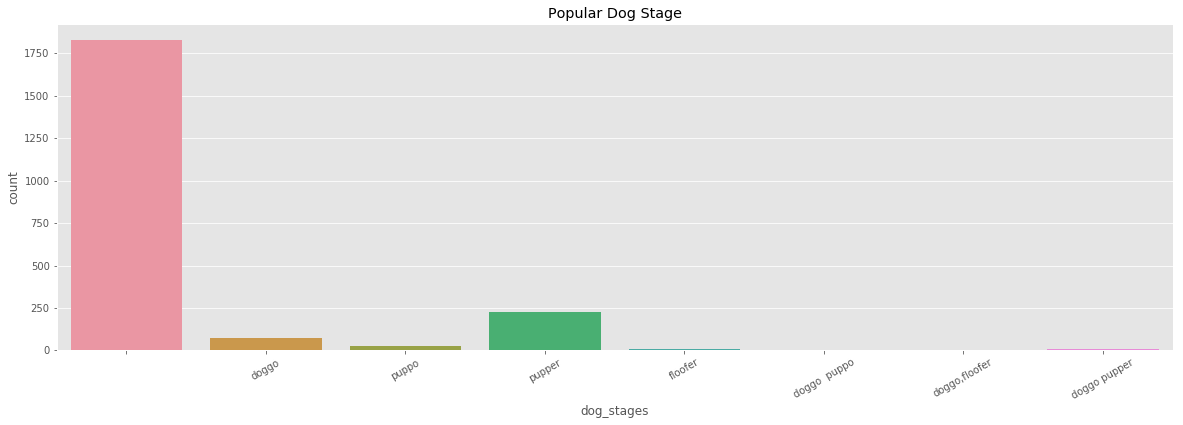

In [160]:
df = Total_Data

plt.style.use('ggplot')
plt.figure(figsize=(20,6))
plt.xticks(rotation=30)
plt.title("Popular Dog Stage")
sns.countplot(x ='dog_stages', data = df)

plt.show()
